# ML Project - Bar Sobel & Din Zur 



<u>Group 12 <u>

Bar Sobel, ID - 206574584<br>
Din Zur, ID - 209493782

### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve,roc_auc_score, auc,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Load external data train set

In [2]:
# Loading the data and working on a copy
data_train_orginal = pd.read_csv("train.csv")
data = data_train_orginal.copy()
train_pipeline = data_train_orginal.copy()

### Load external data test set


In [3]:
data_test_orginal = pd.read_csv("test.csv")
test = data_test_orginal.copy()
test_pipeline = data_test_orginal.copy()

##  <u>DATA EXPLOARTION <u>

* ### Shape of the data

In [4]:
# We want to see the shape of the data
# We don't include in the number of features: the label column and the id column (because it's a serial number)
print(f'number of features: {data.shape[1] - 2}')
print(f'number of observations: {data.shape[0]}')

number of features: 21
number of observations: 10479


 * ###  Understanding the features' type

We check the features' type in the train data.


In [5]:
# Getting information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10479 non-null  int64  
 1   num_of_admin_pages     9874 non-null   float64
 2   admin_page_duration    10066 non-null  float64
 3   num_of_info_pages      9792 non-null   float64
 4   info_page_duration     10162 non-null  object 
 5   num_of_product_pages   10076 non-null  float64
 6   product_page_duration  9858 non-null   object 
 7   total_duration         5726 non-null   float64
 8   BounceRates            10457 non-null  float64
 9   ExitRates              10453 non-null  float64
 10  PageValues             10452 non-null  float64
 11  closeness_to_holiday   9983 non-null   float64
 12  Month                  10454 non-null  object 
 13  device                 10156 non-null  float64
 14  internet_browser       9916 non-null   object 
 15  Re

In [6]:
# Creating lists for the types
bool_f = []
numric_f = []
catagoty_f = []

# Adding each feature to the list he belongs to
for i in data.columns[1:-1]:
    if data[i].dtype == float:
        numric_f.append(i)
    if data[i].dtype == bool:
        bool_f.append(i)
    if data[i].dtype == object:
        catagoty_f.append(i)

print(f'bool :{bool_f}')
print(f'numric :{numric_f}')
print(f'catagory :{catagoty_f}')

bool :[]
numric :['num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages', 'num_of_product_pages', 'total_duration', 'BounceRates', 'ExitRates', 'PageValues', 'closeness_to_holiday', 'device', 'Region', 'B', 'D']
catagory :['info_page_duration', 'product_page_duration', 'Month', 'internet_browser', 'user_type', 'Weekend', 'A', 'C']


Based on the feature information we got from the project files, we decide to sort the features by this way:

In [7]:
categories_features = ['Month', 'device', 'internet_browser', 'Region', 'user_type', 'A', 'C']
bool_features = ['Weekend']
numeric_features = ['num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages', 'info_page_duration', 'num_of_product_pages', 'product_page_duration', 'total_duration', 'BounceRates', 'ExitRates', 'PageValues', 'closeness_to_holiday', 'B', 'D']

print(f'bool_feature :{bool_features}')
print(f'numric_feature :{numeric_features}')
print(f'catagory_feature :{categories_features}')

bool_feature :['Weekend']
numric_feature :['num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages', 'info_page_duration', 'num_of_product_pages', 'product_page_duration', 'total_duration', 'BounceRates', 'ExitRates', 'PageValues', 'closeness_to_holiday', 'B', 'D']
catagory_feature :['Month', 'device', 'internet_browser', 'Region', 'user_type', 'A', 'C']


 * ### Plotting missing values

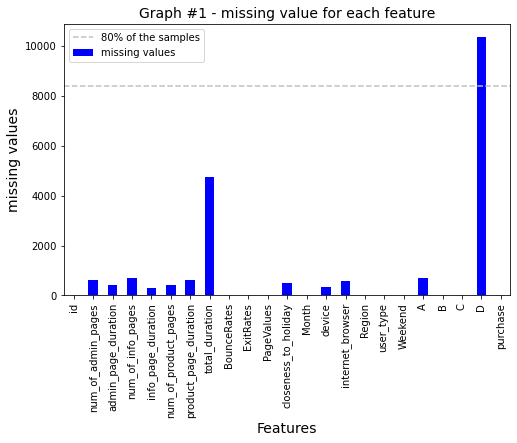

In [8]:
# Creating a new dataframe only with the missing values. We plotted them and a line that represents a threshold (80%)

pd.DataFrame(data = (data.isnull().sum(axis = 0))).rename(columns = {0:'missing values'}).plot.bar(figsize=(8,5), color='blue')
plt.axhline(y = 0.8*data.shape[0], color = 'silver', linestyle = '--', label='80% of the samples')
plt.xlabel('Features', size = 14)
plt.ylabel('missing values', size = 14)
plt.title('Graph #1 - missing value for each feature', size = 14)
plt.legend()

As we can see, feature 'D' has more than 80% missing values. Therfore, we decide to drop it.

In [9]:
# Creating a list of features to drop and append the 'D' feature
list_to_drop = []
list_to_drop.append('D')

 * ### Data correlation

In [10]:
# Visualizing the features' correlations
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
id,1.000000,0.082526,0.044857,0.066631,0.173407,0.151529,-0.054239,-0.077429,0.053881,-0.225908,0.043127,0.010513,-0.016671,-0.129515,0.124522
num_of_admin_pages,0.082526,1.000000,0.591505,0.383974,0.436619,0.447180,-0.222772,-0.317713,0.102648,-0.099734,-0.010604,-0.007737,-0.016465,-0.197337,0.145048
admin_page_duration,0.044857,0.591505,1.000000,0.297256,0.291797,0.445325,-0.141197,-0.202072,0.068009,-0.072091,-0.011671,-0.003730,-0.018782,-0.110871,0.097504
num_of_info_pages,0.066631,0.383974,0.297256,1.000000,0.382615,0.489927,-0.116471,-0.165944,0.046150,-0.051921,-0.011148,-0.032790,-0.021416,-0.167875,0.095563
num_of_product_pages,0.173407,0.436619,0.291797,0.382615,1.000000,0.877881,-0.202365,-0.292254,0.057020,-0.027799,0.000877,-0.043437,-0.019066,-0.326672,0.157167
total_duration,0.151529,0.447180,0.445325,0.489927,0.877881,1.000000,-0.192154,-0.265104,0.054231,-0.049315,-0.007370,-0.046022,-0.026004,-0.236378,0.145429
BounceRates,-0.054239,-0.222772,-0.141197,-0.116471,-0.202365,-0.192154,1.000000,0.911589,-0.116746,0.081161,0.024877,-0.008510,0.008744,0.147855,-0.150683
ExitRates,-0.077429,-0.317713,-0.202072,-0.165944,-0.292254,-0.265104,0.911589,1.000000,-0.172314,0.111041,0.015076,-0.009308,0.007393,0.231711,-0.207804
PageValues,0.053881,0.102648,0.068009,0.046150,0.057020,0.054231,-0.116746,-0.172314,1.000000,-0.062112,0.019302,0.010091,-0.012400,-0.447703,0.486404
closeness_to_holiday,-0.225908,-0.099734,-0.072091,-0.051921,-0.027799,-0.049315,0.081161,0.111041,-0.062112,1.000000,0.018269,-0.012651,-0.005234,0.171953,-0.083926


We want to plot strong correaltions between two features, i.e. correlations above than 0.5.

Text(0.5, 1.0, 'Graph #2 - corr > 0.5')

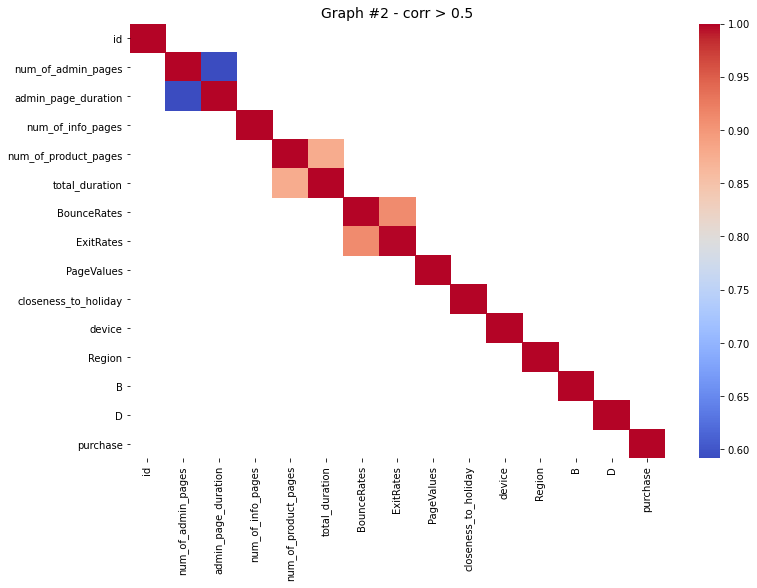

In [11]:
corr = data.corr()
high_corr = corr[corr>=0.5]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap="coolwarm")
plt.title('Graph #2 - corr > 0.5', size = 14)

At this point, we examine all the correlations that have higher correlation than 0.5 with scatter plots to see how they behave together.

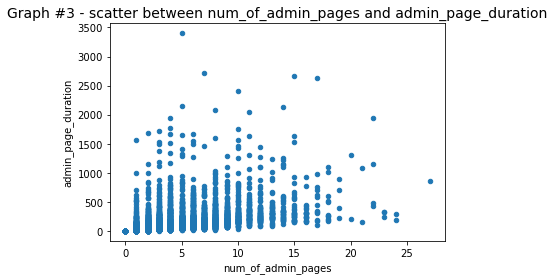

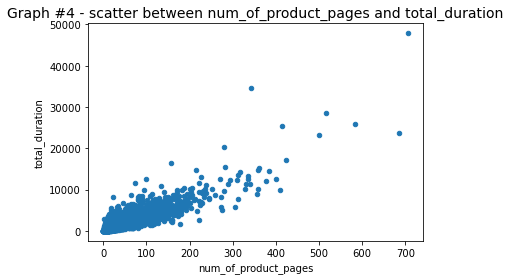

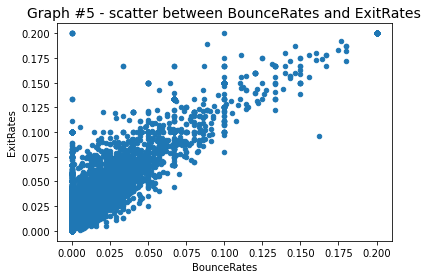

In [12]:
a = ['num_of_admin_pages', 'num_of_product_pages', 'BounceRates']
b = ['admin_page_duration', 'total_duration', 'ExitRates']
for i in range(len(a)):
    data.plot.scatter(x=a[i], y=b[i])
    plt.title(f'Graph #{i+3} - scatter between {a[i]} and {b[i]}', size = 14)


Later, we will remove outliers based on those graphs.


 * ### Plotting histogram of numeric features

Graph #6 - plotting the numeric features: 


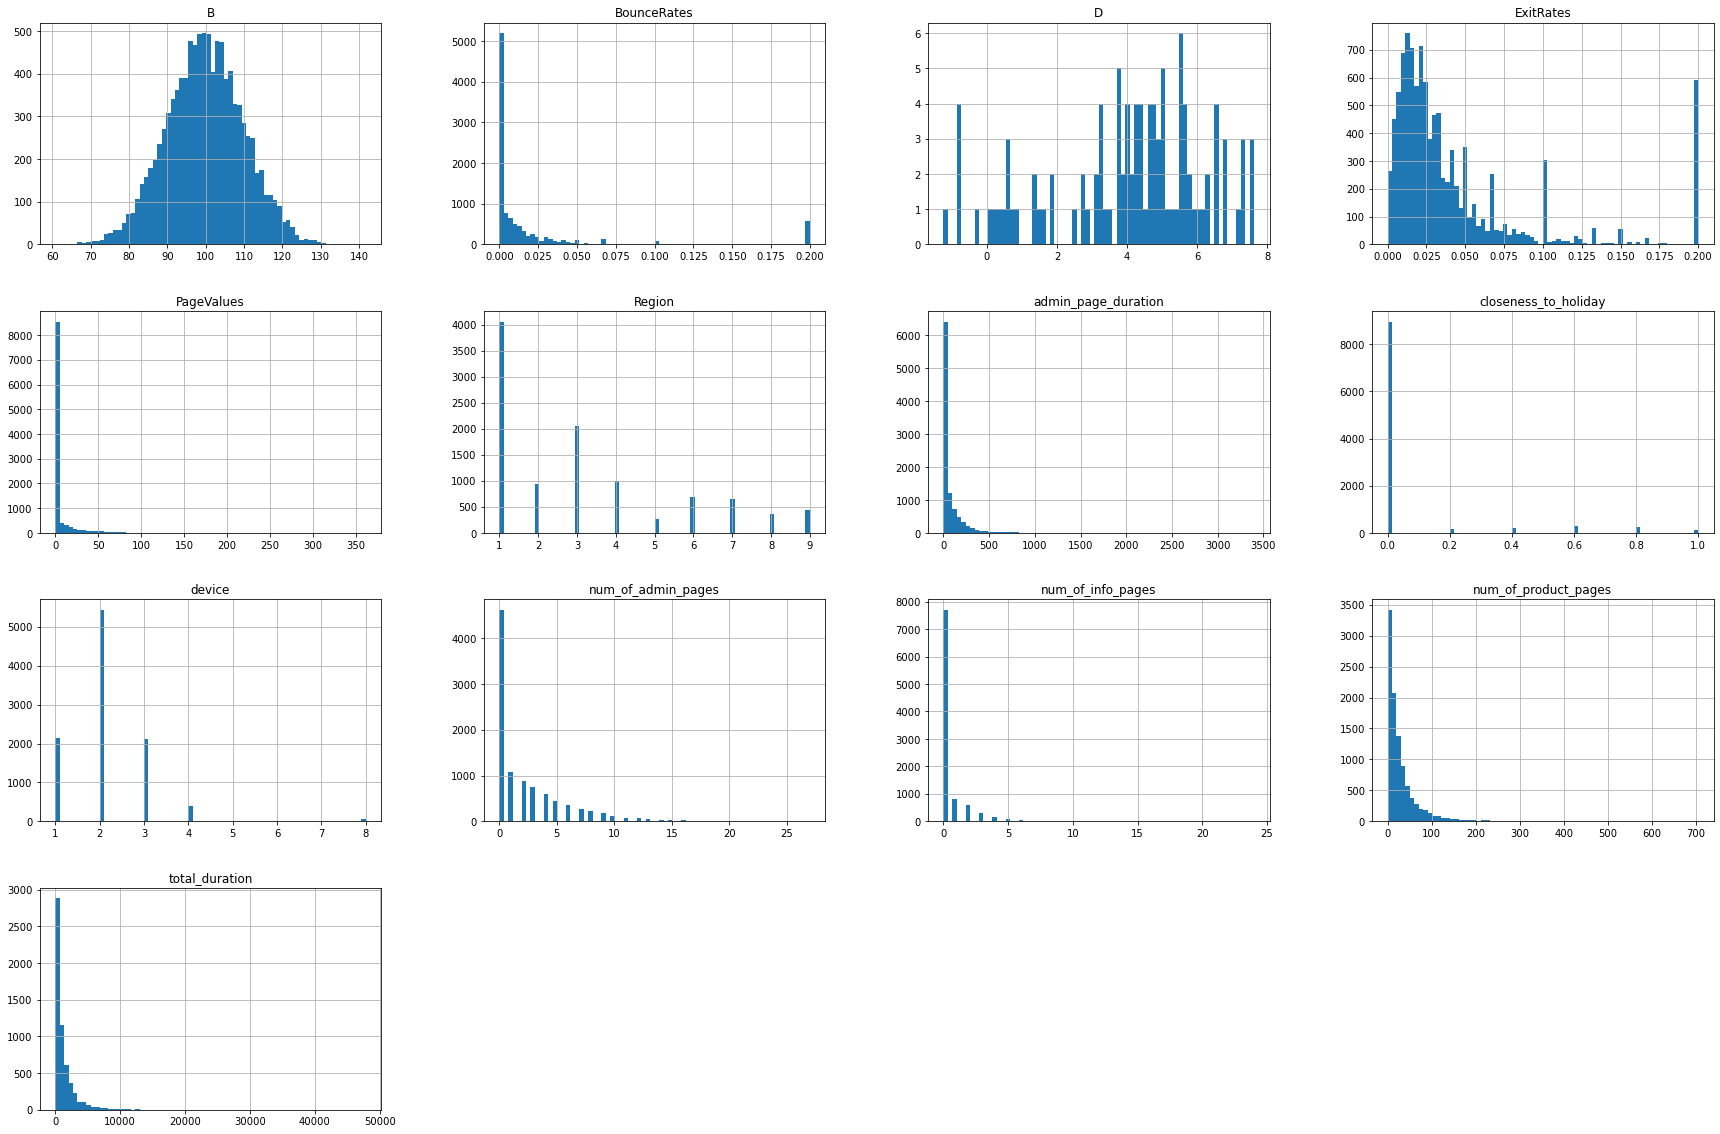

In [13]:
# Plotting histograms for each numeric feature
print("Graph #6 - plotting the numeric features: ")
data.iloc[:,1:-1].hist(figsize=(30, 20), bins=70)
warnings.filterwarnings('ignore')


* ### Checking the mean of each features when the label is '0' and '1'


In [14]:
data.groupby(data['purchase']).mean()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D
purchase,,,,,,,,,,,,,,
0,5077.861820,2.115527,73.004928,0.450966,28.844228,1175.577501,0.024951,0.047151,2.005012,0.069139,2.130845,3.165385,99.786741,4.730612
1,6119.544109,3.455621,121.404414,0.785714,48.264331,1995.569879,0.004896,0.019391,27.199605,0.022827,2.080329,3.102230,99.676084,0.039403


The values in the 'device', 'Region' and 'B' columns are almost identical whether the label is '1' or '0'. let's explore them deeper.

In [15]:
# We created a function that plots histogram of a feature when the purchase is '0' and when the purchase is '1'
# The 'num' paramter is for the graph indexing
def purchase_0_and_1(data, col, num):
    # For purchase = 1
    col_purchase_1 = data[data['purchase'] == 1]
    plt.subplot(1, 2, 1)
    plt.title(f'Graph #{num}: {col} - purchase = 1      ', size = 14)
    col_purchase_1[col].plot.hist(bins=50, color='green')

    # For purchase = 0
    col_purchase_0 = data[data['purchase'] == 0]
    plt.subplot(1, 2, 2)
    plt.title(f'{col} - purchase = 0', size = 14)
    col_purchase_0[col].plot.hist(bins=50, color='red')

 ### - device 

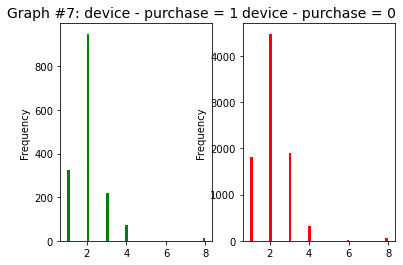

In [16]:
purchase_0_and_1(data, 'device', 7)

### - Region

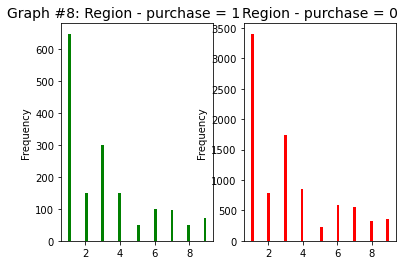

In [17]:
purchase_0_and_1(data, 'Region', 8)

### - B

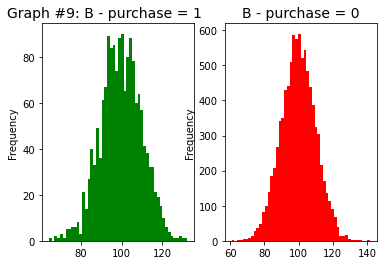

In [18]:
purchase_0_and_1(data, 'B', 9)

Although it seems from the graphs that these features may not have influence on the prediction, we'll examine their importance later.


## <u> Preprocessing <u>

In [19]:
# Working on a copy of the data
train = data.copy()

We wrote functions that help us filling the missing values:


In [20]:
# Filling missing values with the feature's mean
def fill_NA_mean(feature, data):
    data[feature] = data[feature].fillna(data[feature].mean())
    return data

# Returning the mean of a feature
def mean_value(feature, data):
    return data[feature].mean()

# Filling missing values with the feature's median   
def fill_NA_median(feature, data):
    data[feature] = data[feature].fillna(data[feature].median())
    return data

# Returning the median of a feature
def median_value(feature, data):
    return data[feature].median()
    
# Filling missing values with the feature's common value
def fill_NA_common_value(feature, data):
    data[feature] = data[feature].fillna(data[feature].value_counts().index[0])
    return data

# Returning the common value of a feature
def common_value(feature, data):
    return data[feature].value_counts().index[0]
     
# Filling missing values with the median of values in the previous and next observations
def fill_NA_median_backward_foward(feature, data):
    data[feature] = data[feature].fillna(round(pd.concat([data[feature].ffill(),data[feature].bfill()]).groupby(level=0).median()))
    return data    

# Filling missing values in one feature according to values in another feature
def fill_NA_feature_based_on_feature(feature1,feature2,data):
    feature1_mean = data[feature1].mean()
    feature2_high_median = data[data[feature1] >= feature1_mean][feature2].median()
    feature2_low_median = data[data[feature1] < feature1_mean][feature2].median()
    data.loc[data[feature1] >= feature1_mean, feature2] = data.loc[data[feature1] >= feature1_mean, feature2].fillna(feature2_high_median)
    data.loc[data[feature1] < feature1_mean, feature2] = data.loc[data[feature1] < feature1_mean, feature2].fillna(feature2_low_median)
    return data

# Filling missing values of a feature as 'unknown'
def fill_NA_unknown(feature, data):
    data[feature] = data[feature].fillna('unknown')
    return data

Now we explore every feature - filling missing values, covert them to numeric type and remove outliers.

In [21]:
# Checking the number of missing values of every feature
train.isnull().sum()

id                           0
num_of_admin_pages         605
admin_page_duration        413
num_of_info_pages          687
info_page_duration         317
num_of_product_pages       403
product_page_duration      621
total_duration            4753
BounceRates                 22
ExitRates                   26
PageValues                  27
closeness_to_holiday       496
Month                       25
device                     323
internet_browser           563
Region                      19
user_type                   23
Weekend                     23
A                          706
B                           23
C                           23
D                        10374
purchase                     0
dtype: int64

The 'D' feature is already in the list of features we will drop.<br>
As we said before, 'id' is a serial number so it won't be relevant to the models. Therefore, we'll drop it too.


In [22]:
# Appending the 'id' feature to the list of features to drop
list_to_drop.append('id')

Througout the preprocessing, we'll work on the train and test sets on the same time.<br>
Thus, whenever we'll remove outliers, filling missing values etcetra, we'll do it for each data set.

### 1. num_of_admin_pages & admin_page_duration

Based on graph 6, the most common value in 'num_of_admin_pages' appears approximately 45%.<br> Consequently, we fill each missing value in this feature by the median of the backward and forward observations.<br>It gives us more accurate information on the train.<br>We fill the missing values in this feature in the test set by the median of this feature in the train set.<br>

We decide to fill the missing values in 'admin_page_duration' in the train set according to the values in 'num_of_admin_pages' because of their high correlation we saw above, in the heatmap and in the scatter plots.<br>In the test set, we fill the missing values by the mean of this feature in the train set.<br>

We shall removing outliers in both columns based on the scatter plot in graph 3.

In [23]:
def admin_features(train, test):
    # Filling missing values in the 'num_of_admin_pages' feature
    train = fill_NA_median_backward_foward('num_of_admin_pages', train) 

    value = median_value('num_of_admin_pages', train)
    test['num_of_admin_pages'] = test['num_of_admin_pages'].fillna(value)
    
    # Filling missing values in the 'admin_page_duration' feature
    train = fill_NA_feature_based_on_feature('num_of_admin_pages', 'admin_page_duration', train)

    value = mean_value('admin_page_duration', train)
    test['admin_page_duration'] = test['admin_page_duration'].fillna(value)

    # Removing outliers according to the thresholds based on the visualization
    train = train.drop(train[(train['admin_page_duration'] > 3000) | (train['num_of_admin_pages'] > 25)].index)

    return train, test

In [24]:
train, test = admin_features(train, test)

### 2. num_of_info_pages & info_page_duration

As we can see in graph 6, the most common value in the 'num_of_info_pages' appears in more than 80% of the observations so we decide to fill the missing values with it.<br>

The values in the 'info_page_duration' consist "XXX minutes".<br>Therefore, we decide to remove the characters that come after the number of minutes and then convert the values to float type.<br>

Later, we plot the histogram of 'info_page_duration' and we see that its most common value appears in almost 80% of the observations so we decide to fill the missing values with it.<br>

After checking the correlation of 'info_pages_duration' with the other features, we notice a high correlation between 'num_of_info_pages' to 'info_page_duration'.<br>As a result, we use scatter plot to remove outliers their outliers.


In [25]:
def info_features1(train, test):
    # Filling the missing values in the 'num_of_info_pages' feature
    train = fill_NA_common_value('num_of_info_pages', train)

    value = common_value('num_of_info_pages', train)
    test['num_of_info_pages'] = test['num_of_info_pages'].fillna(value)

    # Splitting the strings and converting the values to float
    train['info_page_duration'] = train["info_page_duration"].str.split(" ", 1, expand=True)
    train['info_page_duration'] = train['info_page_duration'].astype(float)

    test['info_page_duration'] = test["info_page_duration"].str.split(" ", 1, expand=True)
    test['info_page_duration'] = test['info_page_duration'].astype(float)

    return train, test


In [26]:
train, test = info_features1(train, test)

Text(0.5, 1.0, 'Graph #10 - info_page_duration histogram')

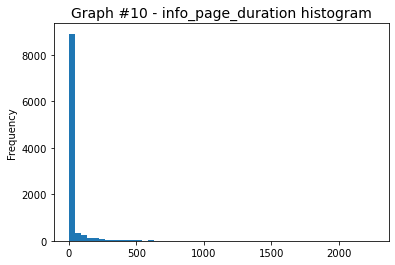

In [27]:
# Plotting 'info_page_duration' histogram
train['info_page_duration'].plot.hist(bins = 50)
plt.title('Graph #10 - info_page_duration histogram', size = 14)

In [28]:
# Checking the correlation of 'info_pages_duration' with the other features
train[train.columns[:-1]].corr()['info_page_duration'][:]

id                      0.046049
num_of_admin_pages      0.250407
admin_page_duration     0.215563
num_of_info_pages       0.604883
info_page_duration      1.000000
num_of_product_pages    0.266193
total_duration          0.414466
BounceRates            -0.073595
ExitRates              -0.105758
PageValues              0.027535
closeness_to_holiday   -0.035953
device                 -0.011664
Region                 -0.025563
B                      -0.013118
D                      -0.247633
Name: info_page_duration, dtype: float64

Text(0.5, 1.0, 'Graph #11 - scatter between num_of_info_pages and info_page_duration')

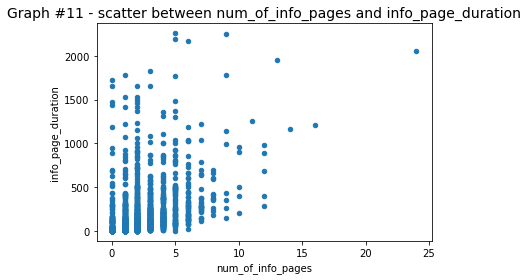

In [29]:
# Plottting these features' scatter plot
train.plot.scatter(x='num_of_info_pages', y='info_page_duration')
plt.title(f'Graph #11 - scatter between num_of_info_pages and info_page_duration', size = 14)


In [30]:
def info_features2(train, test):
    # Filling the missing values in the 'info_page_duration' feature
    train = fill_NA_common_value('info_page_duration', train)

    value = common_value('info_page_duration', train)
    test['info_page_duration'] = test['info_page_duration'].fillna(value)
    
    # Removing outliers in both columns based on the visualization
    train = train.drop(train[(train['info_page_duration'] > 2000) | (train['num_of_info_pages'] > 15)].index)

    return train, test

In [31]:
train, test = info_features2(train, test)

In [32]:
# Creating a function that unite the sub-functions
def info_features(train, test):
    train, test = info_features1(train, test)
    train, test = info_features2(train, test)
    return train, test


### 3. num_of_product_pages & product_page_duration

Based on the graph 6, there is no one value that appears most of the times in the 'num_of_product_pages' feature.<br>Consequently, we fill the missing values by the median of the backward and forward observations.<br>Therefore, we fill the missing values in this feature in the test set by the median of this feature in the train set.

The values in the 'info_page_duration' consist "XXX minutes".<br>Therefore, we decide to remove the characters that come after the number of minutes and then convert the values to float type.<br>

At this point, after the feature's type changed to numeric, we check the correlation between 'num_of_product_pages' and 'product_page_duration' in order to fill the missing values in the last one.<br>

Filling in the train set the 'num_of_product_pages' missing values according to the values in 'product_page_duration' gives us more information.<br>We find the mean of the 'product_page_duration' feature and fill it in the missing values in this feature in the test set.<br>
Due to their high correlation, we shall plot their trand with scatter plot and remove outliers.

In [33]:
def product_features1(train, test):
    # Filling the missing values in the 'num_of_admin_pages' feature
    train = fill_NA_median_backward_foward('num_of_product_pages', train) 

    value = median_value('num_of_product_pages', train)
    test['num_of_product_pages'] = test['num_of_product_pages'].fillna(value)
    
    # Splitting the strings and converting the values to float
    train['product_page_duration'] = train["product_page_duration"].str.split(" ",1,expand=True)
    train['product_page_duration'] = train['product_page_duration'].astype(float)

    test['product_page_duration'] = test["product_page_duration"].str.split(" ",1,expand=True)
    test['product_page_duration'] = test['product_page_duration'].astype(float)

    return train, test

In [34]:
train, test = product_features1(train, test)

In [35]:
# Checking both features correlation
train['num_of_product_pages'].corr(train['product_page_duration'])

0.855464495461291

Text(0.5, 1.0, 'Graph #12 - scatter between num_of_product_pages and product_page_duration')

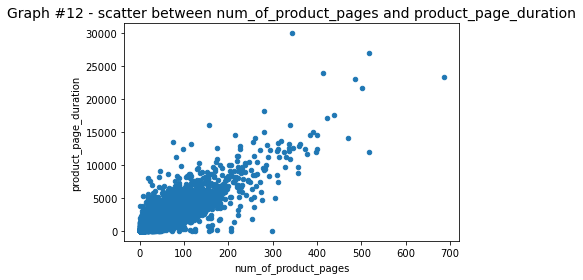

In [36]:
# Plottting these features' scatter plot
train.plot.scatter(x="num_of_product_pages", y="product_page_duration")
plt.title(f'Graph #12 - scatter between num_of_product_pages and product_page_duration', size = 14)

In [37]:
def product_features2(train, test):
  # Filling the missing values in the 'product_page_duration' feature
  train = fill_NA_feature_based_on_feature('num_of_product_pages', 'product_page_duration', train)

  value = mean_value('product_page_duration', train)
  test['product_page_duration'] = test['product_page_duration'].fillna(value)

  # Removing outliers in both columns based on the visualization
  train = train.drop(train[(train['product_page_duration'] > 15000) | (train['num_of_product_pages'] > 400)].index)

  return train, test

In [38]:
train, test = product_features2(train, test)

In [39]:
# Creating a function that unite the sub-functions
def product_features(train, test):
    train, test = product_features1(train, test)
    train, test = product_features2(train, test)
    return train, test

### 4. total_duration

We want to compare the other feature's values when 'total_duration' has missing values and when it has not.

In [40]:
train.groupby(train['total_duration'].isnull()).mean()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
total_duration,,,,,,,,,,,,,,,,,
False,5210.465686,2.283613,75.345334,0.449755,30.823089,31.301120,1125.603929,1252.85429,0.022027,0.043145,5.836630,0.065127,2.124526,3.132995,99.819221,3.883164,0.154587
True,5265.094897,2.326866,79.423566,0.468790,32.000817,31.103121,1142.614676,NaN,0.021730,0.042634,5.993898,0.058507,2.120697,3.186548,99.727026,4.221599,0.154365


We see that they behave similarly so we can put the mean in the missing values. <br>

We also want to visualize the density in order to understand which values should we consider as outliers and then remove them.



In [41]:
def total_duration_feature(train, test):
    # Filling the missing values in the 'total_duration' feature
    train = fill_NA_mean('total_duration', train)
    value  = mean_value('total_duration', train)

    test['total_duration'] = test['total_duration'].fillna(value)

    # Dropping the outliers of the feature based on the plot above
    train = train.drop(train[(train['total_duration'] > 6000)].index)

    return train, test
    

Text(0.5, 1.0, 'Graph #13 - total_duration density')

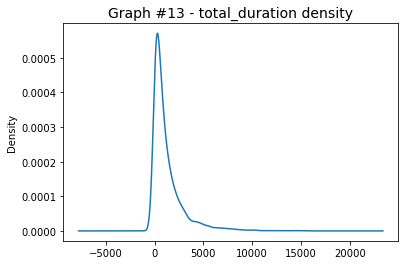

In [42]:
# Plotting the feature's density
train['total_duration'].plot.kde()
plt.title(f'Graph #13 - total_duration density' , size = 14)

In [43]:
train, test = total_duration_feature(train,test)

### 5. BounceRates & Exitrates


We notice that the values in both columns are very low -  between 0 to 0.2.<br>In addition, there are few missing values for each feature.<br>Consequently, we decide to fill the missing values with the most frequent value in each feature.<br>

Based on graph 5, we remove the outliers.

In [44]:
def rate_features(train, test):
    # Filling the missing values in the 'BounceRates' feature
    train = fill_NA_common_value('BounceRates', train)

    value = common_value('BounceRates', train)
    test['BounceRates'] = test['BounceRates'].fillna(value)

    # Filling the missing values in the 'ExitRates' feature
    train = fill_NA_common_value('ExitRates', train)

    value = common_value('ExitRates', train)
    test['ExitRates'] = test['ExitRates'].fillna(value)
    
    # Dropping the ouliers based on graph 5
    train = train.drop(train[(train['BounceRates'] > 0.15) & (train['ExitRates'] < 0.11)].index)

    return train, test
    

In [45]:
train, test = rate_features(train, test)

According to graph 5, we also notice the high correlation between both features.<br>In the next stages of the project, we might consider adding a new feature that would be some kind of linear combination of those features, and then replace them with it.

### 6. PageValues & closeness_to_holiday

In [46]:
# Describing the 'PageValues' feature
train['PageValues'].describe()

count    10270.000000
mean         5.910878
std         18.837172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

On the one hand, we see that 75% of the values are 0 and the maximum value is above 361.
<br>It might indicates us that there are outliers.<br>On the other hand, the values are a measurement to value in money.<br>
Therefore, we won't refer these values as outliers.
<br>
As a result, we decide to fill the few missing values that we have according to the feature's common value.


We do the same process in the 'closeness_to_holiday' feature:

In [47]:
# Describing the 'closeness_to_holiday' feature
train['closeness_to_holiday'].describe()


count    9808.000000
mean        0.062418
std         0.200089
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: closeness_to_holiday, dtype: float64

More than 75% of the values are 0. Furthermore, we don't need to remove outliers because the values are in permanent distances between 0 to 1.


In [48]:
def pagevalue_and_closeness_to_holiday_features(train, test):
    # Filling the missing values in the 'PageValues' feature
    train = fill_NA_common_value('PageValues', train)

    value = common_value('PageValues', train)
    test['PageValues'] = test['PageValues'].fillna(value)

    # Filling missing values in the 'closeness_to_holiday' feature
    train = fill_NA_common_value('closeness_to_holiday', train)

    value = common_value('closeness_to_holiday', train)
    test['closeness_to_holiday'] = test['closeness_to_holiday'].fillna(value)
        
    return train, test

In [49]:
train, test = pagevalue_and_closeness_to_holiday_features(train, test)

###  7. Month

missing values:  25


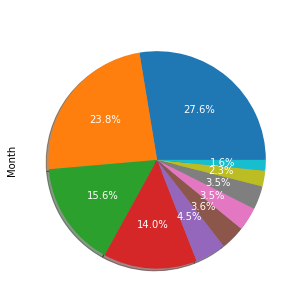

In [50]:
# Printing the number of missing values and plotting the value count
missing_value = train['Month'].isnull().sum()
print("missing values: ", missing_value)
train['Month'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(5,5), textprops = dict(color ="White"))
plt.title('Graph #14 - Pie Chart for Month', color='White', size = 14)
plt.show()


Due to the fact that there are only 25 missing values in this feature, we fill them with the feature's most common value.<br>
Furthermore, because this feature is categorical, we have to create dummy variables.

In [51]:
def month_feature(train, test):
    # Filling the missing values in the 'Month' feature
    train = fill_NA_common_value('Month', train)

    value = common_value('Month', train)
    test['Month'] = test['Month'].fillna(value)

    train = pd.get_dummies(train, prefix="Month", columns=["Month"], drop_first=False)
    test = pd.get_dummies(test, prefix="Month", columns=["Month"], drop_first=False)

    return train, test

In [52]:
train, test = month_feature(train, test)

### 8. device

 Based on graph 7, we didn't see differences in the 'decvice' feature's values when the purchase was 0 and 1.<br>
 Although it seemed that this feature wouldn't help us to forecast the purchase label, we decide to keep it. It might help us later. <br>
<br>
In this feature, we decide to fill the missing values with a new categorial value - 'unknown'.<br>

In light of the categorical type of this feature, we have to create dummy veriables.

In [53]:
def device_feature(train, test):
    # Filling the missing values in the 'device' feature
    train = fill_NA_unknown('device', train)
    test = fill_NA_unknown('device', test)

    train = pd.get_dummies(train, prefix="device", columns=["device"],drop_first=False)
    test = pd.get_dummies(test, prefix="device", columns=["device"],drop_first=False)

    return train, test

In [54]:
train, test = device_feature(train, test)

### 9. internet_browser

In this feature, we decide to fill the missing values with a new categorial value - 'unknown'.<br>

Each browser has different versions. For our models, we grouped by all the versions of each browser and referred it by the browser name.<br>
In addition, we create dummy variables due to the feature's categorical type.

In [55]:
def internetbrowser_feature(train, test):
    # Filling the missing values in the 'internet_browser' feature
    train = fill_NA_unknown('internet_browser', train)
    test = fill_NA_unknown('internet_browser', test)

    # Creating a function that groupe by the browsers' versions
    def browser_name(data):
        data['internet_browser'] = data['internet_browser'].where(data['internet_browser'].str.startswith('browser')==False, 'browser') 
        data['internet_browser'] = data['internet_browser'].where(data['internet_browser'].str.startswith('chrome')==False, 'chrome')
        data['internet_browser'] = data['internet_browser'].where(data['internet_browser'].str.startswith('edge')==False, 'edge')
        data['internet_browser'] = data['internet_browser'].where(data['internet_browser'].str.startswith('safari')==False, 'safari')

    browser_name(train)
    browser_name(test)

    # Converting the feature to dummy variables
    train = pd.get_dummies(train, prefix="internet_browser", columns=["internet_browser"], drop_first=False)
    test = pd.get_dummies(test, prefix="internet_browser", columns=["internet_browser"], drop_first=False)
    
    return train, test

In [56]:
train, test = internetbrowser_feature(train, test)

### 10. Region

missing values:  19


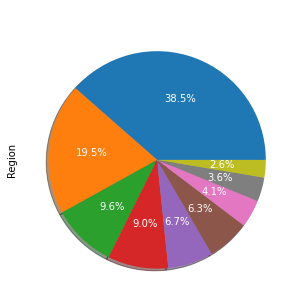

In [57]:
# Printing the number of missing values and plotting the value count
missing_value = train['Region'].isnull().sum()
print("missing values: ", missing_value)
train['Region'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(5,5), textprops = dict(color ="White"))
plt.title('Graph #15 - Pie Chart for Month', color='White', size = 14)
plt.show()

As we can infer from the pie chart, region 1 is the most common region, the next common value appears less of half of the times.<br> That's the reason we choose to fill the missing values with the most common value.<br>

At last, since this feature is categorical, we need to create dummy variables.

In [58]:
def region_feature(train, test):
    # Filling the missing values in the 'Region' feature
    train = fill_NA_common_value('Region',train)

    value = common_value('Region',train)
    test['Region'] = test['Region'].fillna(value)

    # Converting the feature to dummy variables
    train = pd.get_dummies(train, prefix="Region", columns=["Region"], drop_first=False)
    test = pd.get_dummies(test, prefix="Region", columns=["Region"], drop_first=False)

    return train, test


In [59]:
train, test = region_feature(train, test)

### 11. user type

In [60]:
# Printing the number of missing values and the value count
missing_value = train['user_type'].isnull().sum()
print("missing values: ", missing_value)
train['user_type'].value_counts()

missing values:  23


Returning_Visitor    8775
New_Visitor          1427
Other                  72
Name: user_type, dtype: int64

85% of the values are 'Returning_Visitor'. Consequently, we fill the missing values with it. Then, we create dummy variables once again.

In [61]:
def usertype_feature(train, test):
    # Filling the missing values by the commoon value
    train = fill_NA_common_value('user_type', train)

    value = common_value('user_type', train)
    test['user_type'] = test['user_type'].fillna(value)

    # Converting the feature to dummy variables
    train = pd.get_dummies(train, prefix="user_type", columns=["user_type"], drop_first=False)
    test = pd.get_dummies(test, prefix="user_type", columns=["user_type"], drop_first=False)

    return train, test

In [62]:
train, test = usertype_feature(train, test)

### 12. Weekend

In [63]:
# Printing the number of missing values and the value count
missing_value = train['Weekend'].isnull().sum()
print("missing value:",missing_value)
train['Weekend'].value_counts()

missing value: 23


False    7895
True     2379
Name: Weekend, dtype: int64

76% of the values are 'False'. Consequently, we fill the missing values with it. Then, we convert this feature's type to float.

In [64]:
def weekend_feature(train, test):
    # Filling the missing values by the commoon value
    train = fill_NA_common_value('Weekend', train)

    value = common_value('Weekend', train)
    test['Weekend'] = test['Weekend'].fillna(value)

    # Converting the feature's type to float, whereas 'False' becomes 0 and 'True' becomes 1
    train['Weekend'] = train['Weekend'].astype(bool).astype(float)
    test['Weekend'] = test['Weekend'].astype(bool).astype(float)

    return train, test

In [65]:
train, test = weekend_feature(train, test)

### 13. 'A'

In the train set, we have few hundreds of missing values in this feature, so we change them to a new value - 'unknown'. <br>

In addition, there are many values that starts with 'c_20', so we changed them to 'c_20'.

In [66]:
def A_feature1(train, test):
    # Filling missing values in the 'A' feature
    train = fill_NA_unknown('A', train)
    test = fill_NA_unknown('A', test)

    # Shorting the strings that starts with 'c_20'
    train['A'] = train['A'].where(train['A'].str.startswith('c_20')==False, 'c_20') 
    test['A'] = test['A'].where(test['A'].str.startswith('c_20')==False, 'c_20')

    return train, test

In [67]:
train, test = A_feature1(train, test)

In [68]:
# Checking the value counts of this feature in the train set
train['A'].value_counts()

c_2        3014
c_1        1918
c_3        1628
c_4         845
unknown     694
c_13        570
c_10        342
c_6         333
c_8         262
c_5         203
c_11        196
c_20        162
c_7          34
c_9          32
c_15         31
c_19         13
c_14          9
c_18          7
c_16          3
c_17          1
Name: A, dtype: int64

In [69]:
# Checking the value counts of this feature in the test set
test['A'].value_counts()

c_2        562
c_1        331
c_3        289
c_4        143
unknown    121
c_13       109
c_6         76
c_10        57
c_8         49
c_5         36
c_11        27
c_20        26
c_9          8
c_15         4
c_7          3
c_18         3
c_19         3
c_14         3
c_12         1
Name: A, dtype: int64

Removeing outliers: from the train set, we remove values that appeared less than 30 times.<br>
In the test set, we change the values that don't appear in the train set to 'unknown'.<br>

As we do in every categorical feature, we need to create dummy variables.

In [70]:
def A_feature2(train, test):
     # Creating a function that removes observations based on a threshold
    def remove_under(data, column, threshold):
        col = column
        n = threshold   
        data = data[data.groupby(col)[col].transform('count').ge(n)]
        return data

    train = remove_under(train, 'A', 30)

    # Converting values that appears only in the test set to 'unknown'
    lst = ['c_12', 'c_14', 'c_18', 'c_19']
    for i in lst:
        test['A'] = test['A'].where(((test['A'] == i) == False ), 'unknown')

    # Converting the feature's type to numeric by dummy variables
    train = pd.get_dummies(train, prefix="A", columns=["A"], drop_first=False)
    test = pd.get_dummies(test, prefix="A", columns=["A"], drop_first=False)

    return train, test

In [71]:
train, test = A_feature2(train, test)

In [72]:
# Creating a function that unite the sub-functions
def A_feature(train, test):
    train, test = A_feature1(train, test)
    train, test = A_feature2(train, test)
    return train, test

### 14. 'B'

By looking at graph 6, we see that the 'B' feature distributes almost normally. As a result, we can use boxplot to detect and remove the outliers that higher or lower than the interquartile range. <br>

Due to its distribution, we choose to fill the missing values with the feature's mean.

Text(0.5, 1.0, 'Graph #16 - B boxplot')

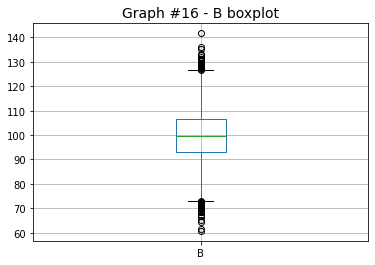

In [73]:
# Using boxplot to see outliers
train.boxplot(column='B')
plt.title('Graph #16 - B boxplot', size = 14)

In [74]:
def B_feature(train, test):
    # Filling missing values in the 'B' feature
    train = fill_NA_mean('B', train)

    value = mean_value('B', train)
    test['B'] = test['B'].fillna(value)

    # Removing outliers based on the interquartile range
    def remove_outliers_normal_distribution(col, data):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        data = data.drop(data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 *IQR)].index)
        return data

    train = remove_outliers_normal_distribution('B', train)

    return train, test

In [75]:
train, test = B_feature(train, test)

### 15. 'C'

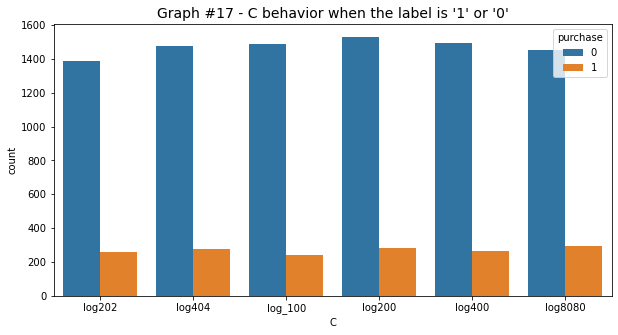

In [76]:
# Plotting the value counts of this feature based on the label
plt.figure(figsize=(10,5))
plt.title("Graph #17 - C behavior when the label is '1' or '0'", size = 14)
sns.countplot(x='C',hue='purchase',data=data)

After deep thinking, we decide to remove this feature.<br>
As we can see from the graph above that the values distibute the same no matter what are the label and the value.

In [77]:
list_to_drop.append('C')

Before we decided dropping 'C' feature, we intended to use the following code in this feature's preproccessing:

    Creating a function that fills the missing values in a unified way.
    
    def fill_na_all_value(data):
    list_c_missing_value= ['log202','log404','log_100','log200','log400','log8080']
    for i in range(data['C'].isnull().sum()):
        data['C'] = data['C'].fillna(list_c_missing_value[i % len(list_c_missing_value)],limit=1)
        return data

    x_train = fill_na_all_value(x_train)
    x_test = fill_na_all_value(x_test)

    x_train = pd.get_dummies(x_train, prefix="C", columns=["C"], drop_first=False)
    x_test = pd.get_dummies(x_test, prefix="C", columns=["C"], drop_first=False)

### Creating a new feature

We saw that 'BounceRates' and 'ExitRates' have very high correlation:

In [78]:
print(train['BounceRates'].corr(train['ExitRates']))

0.8950889877994057


As a result, we decide to create a new feature that combines both of the features.<br>
Now, we should check the correlation of both features with the label: 

In [79]:
print(train['BounceRates'].corr(train['purchase']))
print(train['ExitRates'].corr(train['purchase']))

-0.1500978118237789
-0.2030950761022966


Due to its higher correlation with the label, we set a higher weight in the new feature to 'ExitRates' than the 'BounceRates', as followed:

In [80]:
def newrate_feature(train, test):
    train['MixedRates'] = 0.6 * train['ExitRates'] + 0.4 * train['BounceRates']
    test['MixedRates'] = 0.6 * test['ExitRates'] + 0.4 * test['BounceRates']

    # Adding the old features to future removal
    list_to_drop.append('ExitRates')
    list_to_drop.append('BounceRates')

    return train, test

In [81]:
train, test = newrate_feature(train, test)

### Dropping unnecessary features

Right now, we see which features we decided to drop and dropping it.

In [82]:
# Viewing the list of features to drop
list_to_drop

['D', 'id', 'C', 'ExitRates', 'BounceRates']

In [83]:
def dropping_features(train, test):
    train.drop(list_to_drop, axis=1, inplace=True)
    test.drop(list_to_drop, axis=1, inplace=True)
    
    # Moving the 'purchase' to be the last column
    train = train[[ col for col in train.columns if col != 'purchase' ] + ['purchase']]
    return train, test

In [84]:
train, test = dropping_features(train, test)

### Data normalization

In order to make all the features contribute equally to the models that we'll use, we have to scale or normalize the data. <br>
We saw that almost all the features don't distribute normally. <br>
Therefore, we choose to scale the data with MinMaxScaler and not with a function which assumes that the data distributes normally.<br>
The MinMaxScaler function transforms features by scaling each feature to a given range. The range in our function translates and scales each feature between 0 and 1.

In [85]:
# Creating a function that scales the data
def Min_Max_Scaling(data):
    Min_Max_scaler = MinMaxScaler().fit(data)
    data = pd.DataFrame(Min_Max_scaler.transform(data), index=data.index, columns=data.columns)
    return data

In [86]:
def normalization(train):
    train = Min_Max_Scaling(train)
    return train

In [87]:
train = normalization(train)

### Splitting the data into train and validation

In [88]:
def split_data(train):
    # A new variable that stores all the features except to the label
    x_col = train.columns[:-1]

    # Splitting the data to train and validation sets
    x1_train, y1_train = train.values[:,:-1], train.values[:,-1]
    x_train, x_val, y_train, y_val = train_test_split(x1_train, y1_train, test_size = 0.2, random_state= 42, shuffle=True)
    return x_train, x_val, y_train, y_val, x_col

In [89]:
x_train, x_val, y_train, y_val, x_col = split_data(train)

### Feature selection - Dimensionality  reduction

In [90]:
print("the number of features right now: ", x_train.shape[1])

the number of features right now:  63


Dimensiontality reduction is a vital process in order to improve the models and mitigate overfitting. <br>The Bias-Variance trade-off is influenced by the number of features in the data.<br>
Having many features (more dimensions = more complexity) lead to high variance while the bias getting lower. <br>High dimensionality may affect the models negatively and may cause to overfitting, which we want to avoid.<br> Consequently, we want to be somewhere in the middle - where both the bias and variance are not too high and not too low.

First, we tried to use PCA to redeuce the number of features.

The function we wrote:
    
    pca = PCA(0.99)
    pca.fit(x_train)
    x_train = pd.DataFrame(pca.transform(x_train))

    pca2 = PCA(n_components=len(x_train.columns))
    pca2.fit(x_val)
    x_val = pd.DataFrame(pca2.transform(x_val))

**We didn't choose it eventually.**

At last, we used 'SelectKBest' with score function of 'chi2' to find the best features for the model.<br>
We tried to find the ideal 'K'. After few tries, we concluded that the ideal would be K = 30.

The function we wrote:

In [91]:
def select_k_best(x_train, x_val, x_test,x_col):
    selector = SelectKBest(score_func=chi2, k=30)
    selector.fit(x_train, y_train)

    cols = selector.get_support(indices=True)
    x_train = pd.DataFrame(data = selector.transform(x_train), columns = x_col[cols])
    
    x_val = x_val[:,cols]
    x_val = pd.DataFrame(data = x_val, columns = x_col[cols])

    x_test = pd.DataFrame(data = x_test, columns = x_col[cols])
    return x_train, x_val, x_test

In [92]:
x_train, x_val, test = select_k_best(x_train, x_val, test,x_col)

In [93]:
# Converting the labels to pandas data frame
y_val = pd.DataFrame(data = y_val)
y_train = pd.DataFrame(data = y_train)

# Concatenating the train and validation data sets
x_all_data = pd.concat([x_train,x_val])
y_all_data = pd.concat([y_train,y_val])

## <u> Models <u>

For each of the models we will run, we'll use GridSearch in order to find the optimal values for the main parameters of the model.<br> 

### Logistic Regression

In [94]:
# Logistic Regression model
parameters = {
'penalty': ['l2', 'l1', 'elasticnet'],
    'tol': [0.1, 0.001, 0.0001],
    'C' : [1, 0.1, 0.01, 0.001],
    'solver' :['saga'],
    'l1_ratio' : [0.5, 0.8, 1, None],
    'max_iter' :[70, 85, 100]
}
clf = LogisticRegression(random_state=0)
gscv = GridSearchCV(clf, parameters, scoring='roc_auc')
gscv.fit(x_train, y_train)

best_params = gscv.best_params_
best_score = gscv.best_score_
print(f'Best Params: {best_params} \n')


Best Params: {'C': 1, 'l1_ratio': 0.5, 'max_iter': 70, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001} 



### KNN

In [95]:
# KNN model
parameters = {
    'n_neighbors': [15,40,150],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'weights': ['uniform', 'distance'],
    'leaf_size' : [20, 30,70,100]
}
clf = KNeighborsClassifier()
gscv = GridSearchCV(clf, parameters, scoring='roc_auc')
gscv.fit(x_train, y_train)

best_params = gscv.best_params_
best_score = gscv.best_score_
print(f'Best Params: {best_params} \n')

Best Params: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 150, 'weights': 'distance'} 



### Random Forest

In [96]:
# Random Forest model
parameters = {
    'n_estimators':[100, 200],
    'criterion':['gini', 'entropy'],
    'max_depth':[50, 70, None],
    'min_samples_leaf':[1, 2],   
    'min_samples_split':[2, 8]
}

clf = RandomForestClassifier(random_state=0)
gscv = GridSearchCV(clf, parameters, scoring='roc_auc')
gscv.fit(x_train, y_train)

best_params = gscv.best_params_
best_score = gscv.best_score_
print(f'Best Params: {best_params} \n')

Best Params: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200} 



### MLP

In [97]:
# MLP model
parameters = {
    'hidden_layer_sizes':[100, 130],
    'activation':['relu', 'logistic'],
    'alpha':[0.1, 0.0001],
    'learning_rate_init':[0.01, 0.001],   
    'max_iter':[50, 100]
}

clf = MLPClassifier(random_state=0)
gscv = GridSearchCV(clf, parameters, scoring='roc_auc')
gscv.fit(x_train, y_train)

best_params = gscv.best_params_
best_score = gscv.best_score_
print(f'Best Params: {best_params} \n')

Best Params: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 130, 'learning_rate_init': 0.01, 'max_iter': 100} 



###  Running the chosen models

In [98]:
LR = LogisticRegression(C=1, l1_ratio=0.5, max_iter=70, penalty='l1', solver='saga', tol= 0.0001)
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=20, n_neighbors=150, weights='distance')
RF = RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=2, min_samples_split=8, n_estimators=200)
MLP = MLPClassifier(activation='logistic', alpha=0.0001, hidden_layer_sizes=130, learning_rate_init=0.01, max_iter=100)

### Models evaluation

#### K-Fold Cross Validation

In order to evaluate the models, we use only the train data set after the split and not using the validation data after the split (we want the validation to be like a test set).<br>

In this section, we want to run K-Fold twice. <br>
The first one will be the validation we would get from the K-Fold (not the validation from the split).<br>
The second will be the train we would get from the K-Fold.<br>


We have two goals in this proccess. First, choosing the ideal model by the mean auc results.<br>
Furthermore, understanding the gaps between the train's results to the validation's results mainly to avoid overfitting.<br>

We build a K-Fold function that splits the data for each model to 12 folds, plots the suitable ruc and eventually displays the mean roc in the same graph.

In [99]:
def K_fold_validaion(data, labels, model, k, model_name):
    # Converting the dataframes to numpy arrays
    data = data.to_numpy()
    labels = labels.to_numpy()
    
    # For calculating the mean roc_curve
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []

    # Plotting the random guess line:
    plt.plot([0,1],[0,1],linestyle='--', color='lightcoral')

    # Creating K-Fold Cross Validation:
    kf = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kf.split(data):
        data_train, data_val = data[train_index], data[test_index]
        data_train_labels, data_val_labels = labels[train_index], labels[test_index]
        model.fit(data_train, data_train_labels)
        y_prob = model.predict_proba(data_val)
        y_prob = y_prob[:,1]

        # Plotting the ROC curve
        fpr, tpr, thresholds = roc_curve(data_val_labels, y_prob)
        plt.plot(fpr,tpr,color='mistyrose')

        # For calculating the mean roc_curve
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='maroon', label='Mean ROC (AUC = %0.3f)' % mean_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('The validation ROC curve for {} model'.format(model_name))
    plt.legend()
    plt.show()
    return 


We choose to set the 'k' to k = 12. Now, we want to see the results:

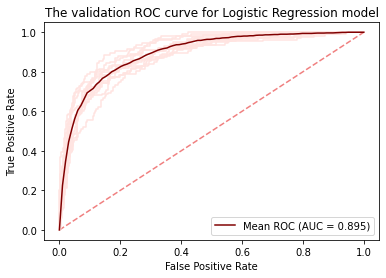

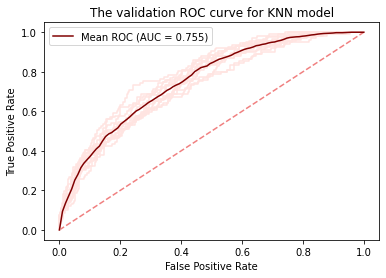

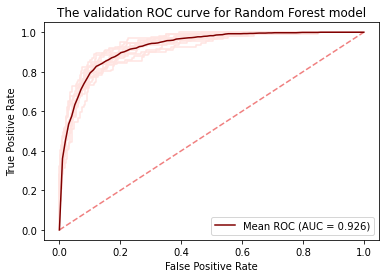

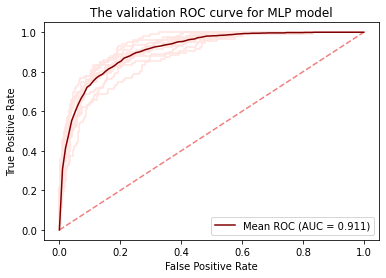

In [100]:
# Plotting the validation's ROC curve for each model

K_fold_validaion(x_train, y_train, LR, 12, "Logistic Regression")
K_fold_validaion(x_train, y_train, KNN, 12, "KNN")
K_fold_validaion(x_train, y_train, RF, 12, "Random Forest")
K_fold_validaion(x_train, y_train, MLP, 12, "MLP")

In [101]:
def K_fold_train(data, labels, model, k, model_name):
    # Converting the dataframes to numpy arrays
    data = data.to_numpy()
    labels = labels.to_numpy()
    
    # For calculating the mean roc_curve
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []

    # Plotting the random guess line:
    plt.plot([0,1],[0,1],linestyle='--', color='lightcoral')

    # Creating K-Fold Cross Validation:
    kf = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kf.split(data):
        data_train, data_val = data[train_index], data[test_index]
        data_train_labels, data_val_labels = labels[train_index], labels[test_index]
        model.fit(data_train, data_train_labels)
        y_prob = model.predict_proba(data_train)
        y_prob = y_prob[:,1]

        # Plotting the ROC curve
        fpr, tpr, thresholds = roc_curve(data_train_labels, y_prob)
        plt.plot(fpr,tpr,color='mistyrose')

        # For calculating the mean roc_curve
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='maroon', label='Mean ROC (AUC = %0.3f)' % mean_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('The train ROC curve for {} model'.format(model_name))
    plt.legend()
    plt.show()
    return 


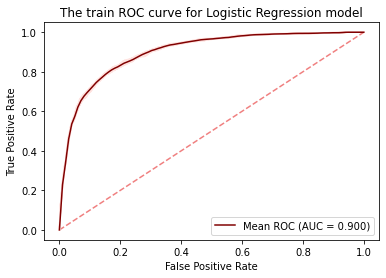

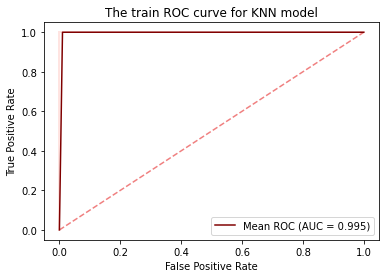

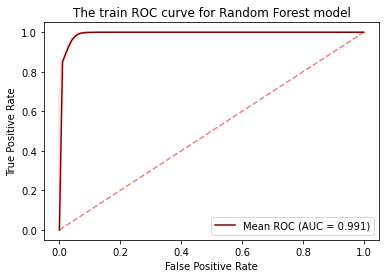

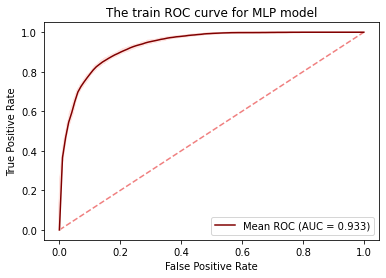

In [102]:
# Plotting the train's ROC curve for each model

K_fold_train(x_train, y_train, LR, 12, "Logistic Regression")
K_fold_train(x_train, y_train, KNN, 12, "KNN")
K_fold_train(x_train, y_train, RF, 12, "Random Forest")
K_fold_train(x_train, y_train, MLP, 12, "MLP")

The model we choose is **Random Forest** because it gave us the higher mean roc.<br>
Although other models have lower gaps in the results between the train and the validation, the gap in the Random Forest is legit.<br>
When we focus in the macro level, this model is the appropriate choice.

## Confusion Matrix

In [103]:
# Fitting the chosen model
RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=200)

The accuracy of the validation data: 0.9053457577243746


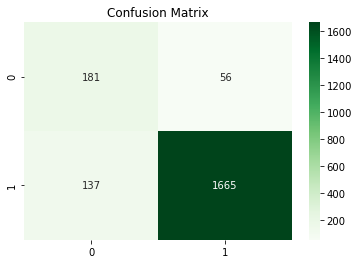

In [104]:
# Running a confusion matrix on the validation data of the chosen model
tn_val, fp_val, fn_val, tp_val = confusion_matrix(y_val,RF.predict(x_val)).ravel()
confusion_matrix_val = np.array([[tp_val, fp_val],[fn_val, tn_val]])

print("The accuracy of the validation data:", (tp_val + tn_val) / (tn_val + fp_val + fn_val + tp_val))
sns.heatmap(confusion_matrix_val, annot=True, fmt='g', cmap='Greens', xticklabels = [0,1], yticklabels = [0,1])
plt.title('Confusion Matrix')
plt.show()

For Random Forest model Confusion Matrix:

* TP describes the sitautaion that the user purchased and the model predicted it.

* TN describes the sitautaion that the user didn't purchase and the model predicted it.

* FP describes the sitautaion that the user didn't purchase but the model predicted that he purchased.

* FN describes the sitautaion that the user purchased but the model predicted that he didn't purchase.

To establish our model choice we plot the roc curves of the train and validation.

In [105]:
def plot_auc_and_roc(x, y, state):
    fpr, tpr, thresholds = roc_curve(y, RF.predict_proba(x)[:,1])
    auc = roc_auc_score(y, RF.predict_proba(x)[:,1])

    plt.plot(fpr, tpr, color='Blue')
    plt.plot([0, 1], [0, 1], color='Blue', linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')   
    plt.title(f'ROC Curve of {state} (AUC = %0.3f)' % auc)
    plt.show()

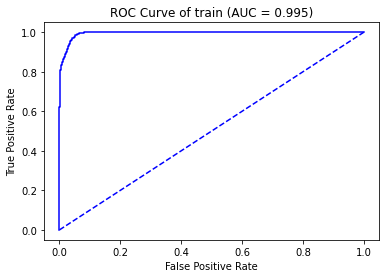

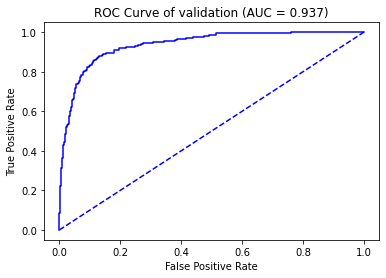

In [106]:
plot_auc_and_roc(x_train, y_train, 'train')
plot_auc_and_roc(x_val, y_val, 'validation')

### Predictions 

At the end of the project, we fit the Random Forest model on the whole train data and predict the test set results.

In [107]:
RF_final = RF.fit(x_all_data ,y_all_data)

In [108]:
def  Probabilities_Prediction(test,model):
        
    predictions = pd.DataFrame(data = model.predict_proba(test)[:,1])
    predictions = predictions.rename(columns = {0:'predict_prob'})
    predictions.insert(0, 'id', range(0,test.shape[0]))
    predictions.to_csv("Submission_group_12.csv", index = False)


In [109]:
Probabilities_Prediction(test, RF_final)

### Pipeline

The pipeline is a way to codify and automate the project's workflow.<br>
The pipeline consists of multiple sequential steps that do everything from preprocessing to model training and deployment.

The output of the pipeline will be a csv file with the test set predictions.

In [110]:
def pipeline(train, test):
    
    train, test = admin_features(train,test)
    train, test = info_features(train,test)
    train, test = product_features(train,test)
    train, test = total_duration_feature(train,test)
    train, test = rate_features(train,test)
    train, test = pagevalue_and_closeness_to_holiday_features(train,test)
    train, test = month_feature(train,test)
    train, test = device_feature(train,test)
    train, test = internetbrowser_feature(train,test)
    train, test = region_feature(train,test)
    train, test = usertype_feature(train,test)
    train, test = weekend_feature(train,test)
    train, test = A_feature(train,test)
    train, test = B_feature(train,test)
    train, test = newrate_feature(train,test)
    train, test = dropping_features(train,test)
    train = normalization(train)
    x_train, x_val, y_train, y_val, x_col = split_data(train)
    x_train, x_val, test = select_k_best(x_train, x_val, test, x_col)
    y_val = pd.DataFrame(data = y_val)
    y_train = pd.DataFrame(data = y_train)
    x_all_data = pd.concat([x_train, x_val])
    y_all_data = pd.concat([y_train, y_val])
    clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=50, min_samples_leaf=2, min_samples_split=8).fit(x_all_data,y_all_data)
    Probabilities_Prediction(test, clf_RF)

We wrote the following code for running the pipeline in a comment, because we already did the prediction above.


In [111]:
#pipeline(train_pipeline, test_pipeline)